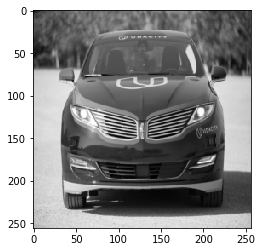

In [1]:
import cv2
import scipy.misc 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline


img_path = 'udacity_sdc.png'

# load color image
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# resize to smaller 
height = 256 
width = 256

small_img = np.array(Image.fromarray(gray_img).resize((height,width), Image.BILINEAR)).astype(np.double)

# rescale entries to lie in [0,1]
small_ing = small_img.astype("float32")/255

# plot image
plt.imshow(small_img, cmap='gray')
plt.show()

TypeError: Image data of dtype <U15 cannot be converted to float

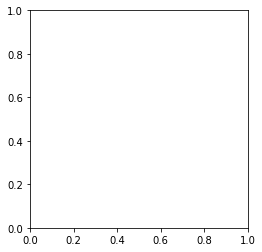

In [4]:
plt.imshow(img_path)
plt.show()

In [5]:
import cv2 

img_path = 'udacity_sdc.png'

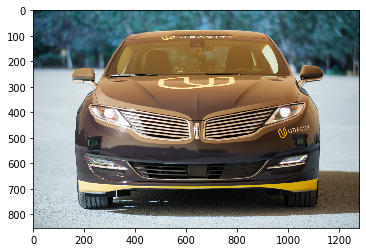

In [6]:
img_original = cv2.imread(img_path, cv2.IMREAD_COLOR)

plt.imshow(img_original)
plt.show()

In [3]:
original = cv2.imread(img_path, cv2.IMREAD_COLOR)
gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
unchange = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

cv2.imshow('original', original)
cv2.imshow('GRAy', gray)
cv2.imshow('Unchange', unchange)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 1. import the Image

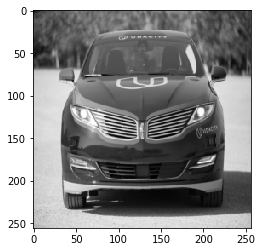

In [7]:
import cv2 
import scipy.misc 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline 

img_path = 'udacity_sdc.png'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# resize to smaller 
height = 256 
width = 256

small_img = np.array(Image.fromarray(gray_img).resize((height,width), Image.BILINEAR)).astype(np.double)

# rescale entriees to lie in [0,1]
small_img = small_img.astype("float32")/255

# plot image 
plt.imshow(small_img, cmap='gray')
plt.show()

### 2. Specify the Filters

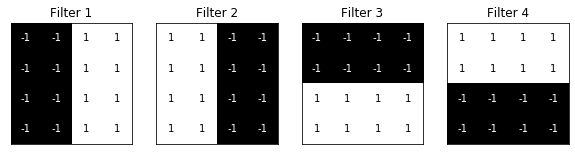

In [9]:
import numpy as np

# make filters 
filter_vals = np.array([
    [-1, -1, 1, 1],
    [-1, -1, 1, 1],
    [-1, -1, 1, 1],
    [-1, -1, 1, 1]
])

filter_1 = filter_vals
filter_2 = - filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

# visualize all filters 
fig = plt.figure(figsize=(10,5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y])
                       , xy = (y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')
            

### 3. Visualize the Activation Maps for Each Filter

In [10]:
from keras.models import Sequential 
from keras.layers.convolutional import Convolution2D
import matplotlib.cm as cm

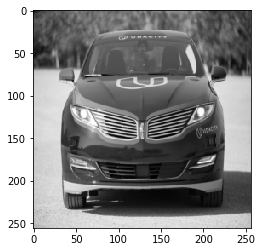

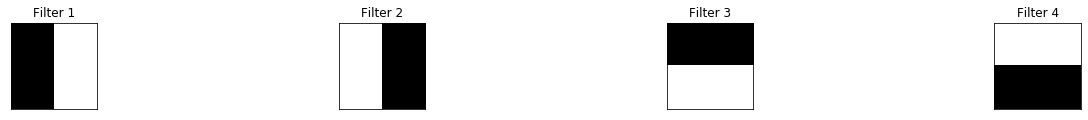

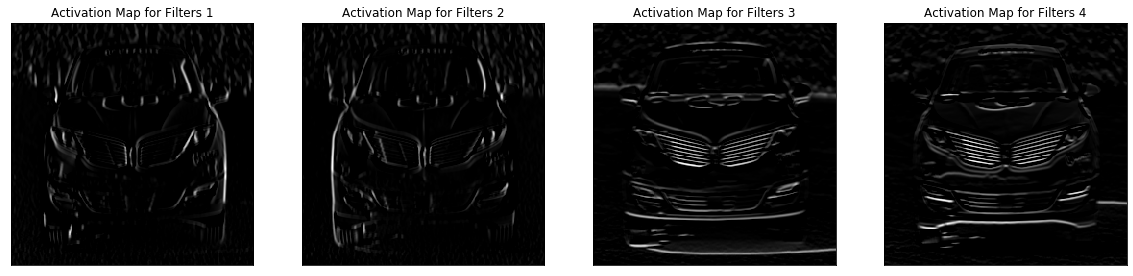

In [15]:
# plot image 
plt.imshow(small_img, cmap='gray')

# define a neural network with a single convolutional layer with one filter 
model = Sequential()
model.add(Convolution2D(1, (4, 4), activation='relu', input_shape=(small_img.shape[0]
                                                                 ,small_img.shape[1],1)))

# apply convolutional filter and return output
def apply_filter(img, index, filter_list, ax):
    # set the weights of the filter in the convolutional layer to filter_list[i]
    model.layers[0].set_weights([np.reshape(filter_list[i],(4,4,1,1)), np.array([0])])
    # plot the corresponding activation map 
    ax.imshow(np.squeeze(model.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))), cmap='gray')

    
# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    
    
# visualize all actiavtion maps 
fig = plt.figure(figsize=(20, 20))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    apply_filter(small_img, i, filters, ax)
    ax.set_title('Activation Map for Filters %s' % str(i+1))